# Assignment 8: DT

**Source**

1. AAIC referrence IPython notebooks
2. Mail communication from AAIC team. 
3. Stackoverflow links for heapmap , loading pickle files. 

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_path = 'drive/My Drive/preprocessed_data.csv'
glove_path = 'drive/My Drive/glove_vectors'

In [ ]:
import pandas
data = pandas.read_csv(data_path)

In [ ]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
X = data.drop(["project_is_approved"], axis= 1)
y = data["project_is_approved"].values
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify= y) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## 1 Vectorizing Text data with TFIDF

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
essay_tfidf_vectorizer = TfidfVectorizer(min_df= 10, max_features= 5000)
essay_tfidf_vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = essay_tfidf_vectorizer.transform(X_train['essay'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = essay_tfidf_vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


## 2 TFIDF weighted W2V on essay

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open(glove_path, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
# computing average word2vec for each review.

tfidf_w2v_essay_train = []; # An empty list to  store values of avg w2v
for sentence in tqdm(X_train['essay'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each words
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|██████████| 73196/73196 [02:23<00:00, 508.47it/s]

73196
300


In [ ]:
## The below code is same as above to calculate for test data.

tfidf_w2v_essay_test = [];
for sentence in tqdm(X_test['essay'].values, position= 0, leave= True):
    vector = np.zeros(300)
    tf_idf_weight =0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|██████████| 36052/36052 [01:09<00:00, 516.17it/s]

36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1 Encoding categorical feature: School_state

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## 2. encoding categorical features: clean_categories

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
#print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## 3. encoding categorical features: clean_subcategories

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
#print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## 4. encoding categorical features: teacher_prefix

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## 5. encoding categorical features: project_grade_category

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## 6. encoding numerical features: teacher_number_of_previously_posted_projects

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_projects_norm.shape, y_train.shape)
#print(X_cv_projects_norm.shape, y_cv.shape)
print(X_test_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [ ]:
# X_train_projects_norm = X_train_projects_norm.reshape(1,-1)
# X_test_projects_norm = X_test_projects_norm.reshape(1,-1)
X_train_projects_norm = X_train_projects_norm.reshape(-1,1)
X_test_projects_norm = X_test_projects_norm.reshape(-1,1)
print(X_train_projects_norm.shape, y_train.shape)
print(X_test_projects_norm.shape, y_test.shape)

(73196, 1) (73196,)
(36052, 1) (36052,)


## 7. encoding numerical features: Price

In [ ]:
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [ ]:
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)

(73196, 1) (73196,)
(36052, 1) (36052,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1.Concatenating all the Features of Set 1: categorical, numerical features + essay (TFIDF)

In [ ]:
# https://stackoverflow.com/a/19710648/4084039 ( merge two sparse matrices)
from scipy.sparse import hstack
X_train_A = hstack((X_train_essay_tfidf, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_projects_norm)).tocsr()
X_test_A = hstack((X_test_essay_tfidf, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_projects_norm)).tocsr()

print("Final Data matrix")
print(X_train_A.shape, y_train.shape)
print(X_test_A.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [ ]:
## 1.1 Hyperparameter tuning for Set 1

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion='gini', class_weight= 'balanced')
parameters = {"max_depth" :[1,5,10,50], "min_samples_split" : [5,10,100,500]}

DTClfGS = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
DTClfGS.fit(X_train_A, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [ ]:
CV_Results = pd.DataFrame.from_dict(DTClfGS.cv_results_)
CV_Results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.878594,0.011236,0.025912,0.000633,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
1,0.870106,0.003406,0.025550,0.000124,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
2,0.876767,0.009275,0.025433,0.000062,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
3,0.870496,0.003111,0.025574,0.000209,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
4,4.091064,0.035194,0.026750,0.000143,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.633581,0.631178,0.621865,0.628875,0.005053,6,0.647840,0.645839,0.649631,0.647770,0.001549


In [ ]:
CV_Results = CV_Results.sort_values(['param_max_depth'])
train_auc= CV_Results['mean_train_score']
train_auc_std= CV_Results['std_train_score']
cv_auc = CV_Results['mean_test_score'] 
cv_auc_std= CV_Results['std_test_score']
max_depth =  CV_Results['param_max_depth']
min_samples_split = CV_Results['param_min_samples_split']

In [ ]:
print('Best score: ',DTClfGS.best_score_)
print('Parameters with best score: ',DTClfGS.best_params_)

Best score:  0.6447001454805761
Parameters with best score:  {'max_depth': 10, 'min_samples_split': 500}


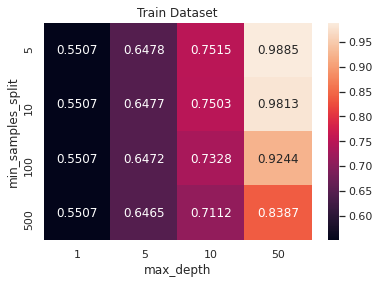

In [ ]:
## In GoogleColab , 3D is failed to plot 
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': train_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Train Dataset")
plt.show()


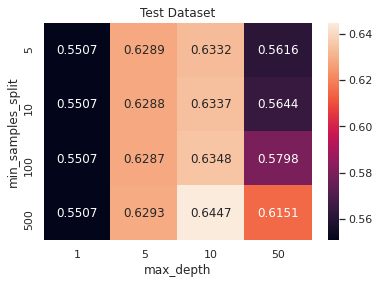

In [ ]:
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': cv_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Test Dataset")
plt.show()

In [ ]:
## 1.3 Testing the performance of the model on test data, plotting ROC Curves
def prob_predict(clf, data):
    y_data_pred = []
    y_data_pred.extend(clf.predict_proba(data)[:,1])
    return y_data_pred   

In [ ]:
best_max_depth= DTClfGS.best_params_['max_depth']
best_min_samples_split= DTClfGS.best_params_['min_samples_split']
print("best_max_depth= ",best_max_depth)
print("best_min_samples_split= ",best_min_samples_split)

best_max_depth=  10
best_min_samples_split=  500


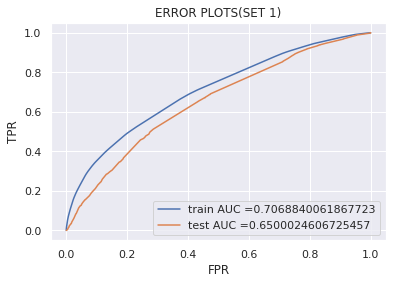

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


dt_set1 = DecisionTreeClassifier(max_depth= best_max_depth, min_samples_split= best_min_samples_split ,class_weight='balanced')
dt_set1.fit(X_train_A, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(dt_set1, X_train_A)
y_test_pred = prob_predict(dt_set1, X_test_A)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS(SET 1)")
plt.grid(True)
plt.show()

In [ ]:
## 1.4 Confusion Matrix

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

def get_confusion_matrix(y_train, y_train_pred):
    cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])

the maximum value of tpr*(1-fpr) 0.41585714425396697 for threshold 0.495


Train Confusion Matrix


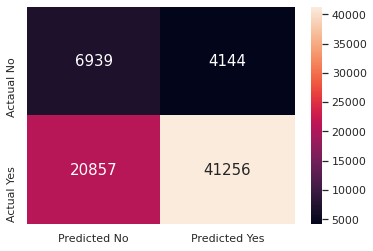

In [ ]:
print("Train Confusion Matrix")
get_confusion_matrix(y_train, y_train_pred)

Test Confusion Matrix


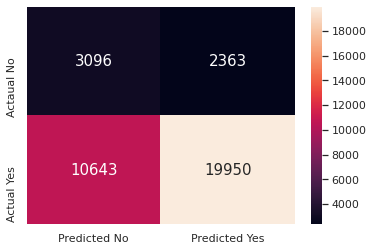

In [ ]:
print("Test Confusion Matrix")
get_confusion_matrix(y_test, y_test_pred)

In [ ]:
#get all the false positive data points with test dataset
actual_output = y_test
pred_output = predict_with_best_t(y_test_pred, best_t)
print(actual_output[100], pred_output[100])

1 1


In [ ]:
false_positive_data = []
for i in range(len(y_test)):
    if (actual_output[i] == 0) &  (pred_output[i] == 1):
        false_positive_data.append(i)
print(false_positive_data[0:20])                  ## 20 false positive points
print(len(false_positive_data))

[2, 10, 22, 43, 48, 53, 91, 95, 97, 101, 105, 116, 128, 154, 157, 170, 171, 191, 217, 227]
2363


In [ ]:
false_positive_essay1= []
for i in false_positive_data:
    false_positive_essay1.append(X_test['essay'].values[i])
print(len(false_positive_essay1))

2363


In [ ]:
import wordcloud
import nltk
import string
from nltk.corpus import stopwords

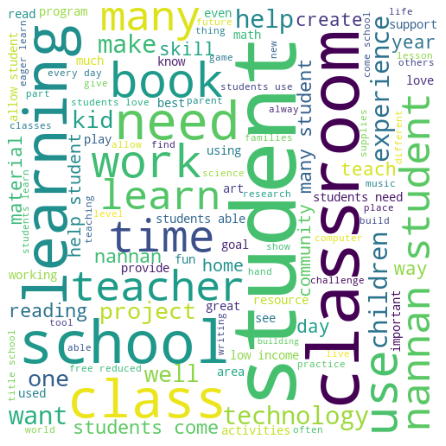

In [ ]:
## 1.5 Plot the WordCloud with the words of essay text of these false positive data points

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = list(STOPWORDS)
for val in false_positive_essay1:
    # typecaste each val to string 
    val = str(val) 
   # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
## 1.6 Plot the box plot with the price of the false positive data points of set 1

false_positive_price1= []
for i in false_positive_data:
    false_positive_price1.append(X_test['price'].values[i])
print(len(false_positive_price1))

2363


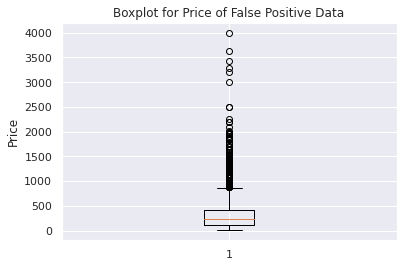

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([false_positive_price1])
plt.ylabel('Price')
plt.title("Boxplot for Price of False Positive Data")
plt.grid(True)
plt.show()

In [ ]:
## 1.7 Plot pdf with teacher_number_of_previously_posted_projects of false positive data points of set_1

false_positive_prev_projects1= []
for i in false_positive_data:
    false_positive_prev_projects1.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(false_positive_prev_projects1))

2363


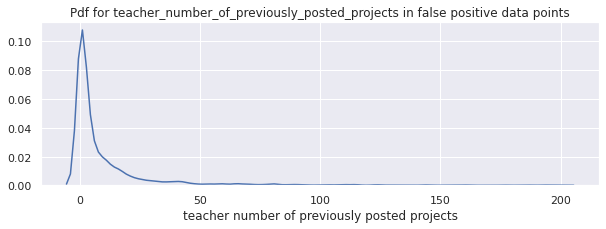

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_prev_projects1, hist=False)
plt.title("Pdf for teacher_number_of_previously_posted_projects in false positive data points")
plt.xlabel("teacher number of previously posted projects")
plt.show()

## 2.Concatenating all the Features of Set 2: categorical, numerical features + essay (TFIDF W2V)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_B = hstack((tfidf_w2v_essay_train, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_projects_norm)).tocsr()
X_test_B = hstack((tfidf_w2v_essay_test, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_projects_norm)).tocsr()

print("Final Data matrix")
print(X_train_B.shape, y_train.shape)
print(X_test_B.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 401) (73196,)
(36052, 401) (36052,)


In [ ]:
## 1 Hyperparameter tuning for Set 2

dt_set2 = DecisionTreeClassifier(criterion='gini', class_weight= 'balanced')
parameters = {"max_depth" :[1,5,10,50], "min_samples_split" : [5,10,100,500]}

DTClfGS1 = GridSearchCV(dt_set2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
DTClfGS1 = DTClfGS.fit(X_train_B, y_train)

In [ ]:
results = pd.DataFrame.from_dict(DTClfGS1.cv_results_)
results = results.sort_values(['param_max_depth'])


train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']
min_samples_split = results['param_min_samples_split']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.727030,0.011594,0.047252,0.000350,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.553924,0.549058,0.549155,0.550712,0.002272,11,0.549106,0.55154,0.551491,0.550712,0.001136
1,2.745688,0.016891,0.047234,0.000039,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.553924,0.549058,0.549155,0.550712,0.002272,11,0.549106,0.55154,0.551491,0.550712,0.001136
2,2.710161,0.003559,0.047228,0.000151,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.553924,0.549058,0.549155,0.550712,0.002272,11,0.549106,0.55154,0.551491,0.550712,0.001136
3,2.716554,0.005057,0.047226,0.000043,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.553924,0.549058,0.549155,0.550712,0.002272,11,0.549106,0.55154,0.551491,0.550712,0.001136
4,13.277698,0.139406,0.048720,0.000150,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.629716,0.629893,0.624817,0.628142,0.002352,3,0.660446,0.66463,0.658201,0.661092,0.002664


In [ ]:
print('Best score: ',DTClfGS1.best_score_)
print('Parameters with best score: ',DTClfGS1.best_params_)

Best score:  0.6292028714247809
Parameters with best score:  {'max_depth': 5, 'min_samples_split': 500}


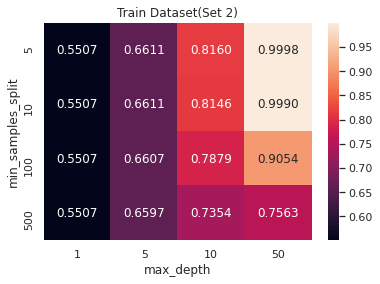

In [ ]:
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': train_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Train Dataset(Set 2)")
plt.show()


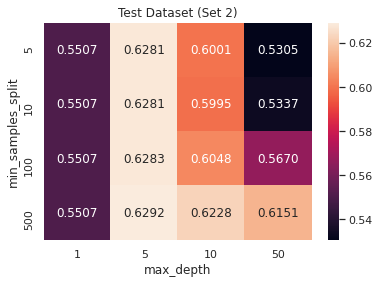

In [ ]:
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': cv_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Test Dataset (Set 2)")
plt.show()

In [ ]:
## 2.3 Testing the performance of the model on test data, plotting ROC Curves
best_max_depth= DTClfGS1.best_params_['max_depth']
best_min_samples_split= DTClfGS1.best_params_['min_samples_split']
print("best_max_depth= ",best_max_depth)
print("best_min_samples_split= ",best_min_samples_split)

best_max_depth=  5
best_min_samples_split=  500


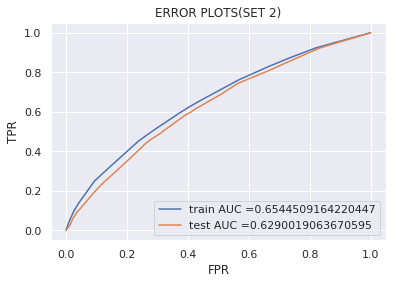

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


dt_set2 = DecisionTreeClassifier(max_depth= best_max_depth, min_samples_split= best_min_samples_split ,class_weight='balanced')
dt_set2.fit(X_train_B, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(dt_set2, X_train_B)
y_test_pred = prob_predict(dt_set2, X_test_B)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS(SET 2)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.3730838564336596 for threshold 0.496


Train Confusion Matrix


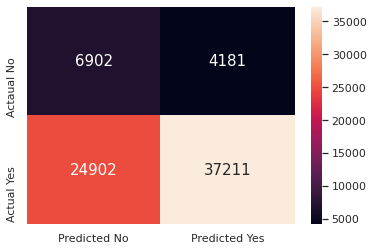

In [ ]:
print("Train Confusion Matrix")
get_confusion_matrix(y_train, y_train_pred)

Test Confusion Matrix


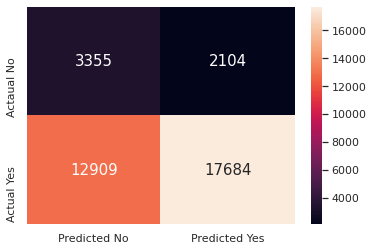

In [ ]:
print("Test Confusion Matrix")
get_confusion_matrix(y_test, y_test_pred)

In [ ]:
#get all the false positive data points with test dataset
actual_output = y_test
pred_output = predict_with_best_t(y_test_pred, best_t)
print(len(actual_output))
print(len(pred_output))

36052
36052


In [ ]:
false_positive_data = []
for i in range(len(y_test)):
    if (actual_output[i] == 0) &  (pred_output[i] == 1):
        #print(i)
        false_positive_data.append(i)
print(false_positive_data[0:20])
print(len(false_positive_data))

[2, 21, 22, 50, 54, 79, 91, 95, 97, 116, 126, 128, 149, 154, 157, 170, 191, 197, 199, 227]
2104


In [ ]:
false_positive_essay2= []
for i in false_positive_data:
    false_positive_essay2.append(X_test['essay'].values[i])
print(len(false_positive_essay2))

2104


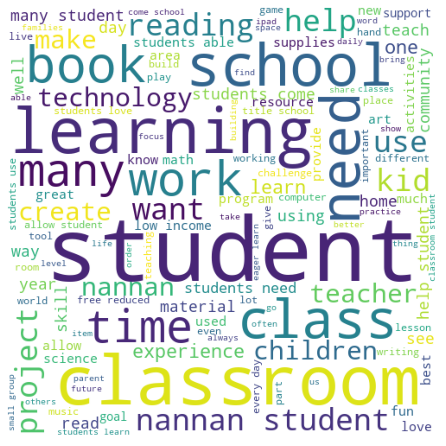

In [ ]:
## 5 Plot the WordCloud with the words of essay text of the false positive data points of set 2

### Plot the WordCloud with the words of essay text of these false positive data points
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = list(STOPWORDS)
for val in false_positive_essay2:
    # typecaste each val to string 
    val = str(val) 
   # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
## 6 Plot the box plot with the price of the false positive data points of set 2

false_positive_price2= []
for i in false_positive_data:
    false_positive_price2.append(X_test['price'].values[i])
print(len(false_positive_price2))

2104


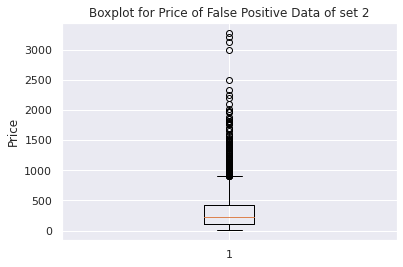

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([false_positive_price2])
plt.ylabel('Price')
plt.title("Boxplot for Price of False Positive Data of set 2")
plt.grid(True)
plt.show()

In [ ]:
## 7 Plot pdf with teacher_number_of_previously_posted_projects of false positive data points of set_2

false_positive_prev_projects2= []
for i in false_positive_data:
    false_positive_prev_projects2.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(false_positive_prev_projects2))

2104


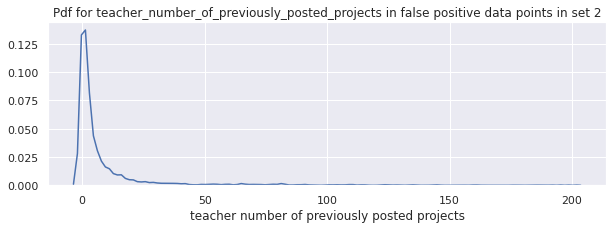

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_prev_projects2, hist=False)
#sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
#plt.legend()
plt.title("Pdf for teacher_number_of_previously_posted_projects in false positive data points in set 2")
plt.xlabel("teacher number of previously posted projects")
plt.show()

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt = dt.fit(X_train_A, y_train)

In [ ]:
print(X_train_A.shape,y_train.shape)

(73196, 5101) (73196,)


In [ ]:
imp_fea = dt.feature_importances_

In [ ]:
index = []
reqd_features_number = 0
for i in range (len(imp_fea)):
    if imp_fea[i] > 0:
        index.append(i)
        reqd_features_number+=1
print(reqd_features_number)

2393


In [ ]:
#https://stackoverflow.com/questions/48099075/how-to-get-columns-from-big-sparse-csc-matrix/48102314
imp_feat = []
for i in tqdm(index):
    imp_feat.append(X_train_A[:,i])
X_new_tr = hstack(imp_feat)

100%|██████████| 2393/2393 [01:04<00:00, 37.34it/s]


In [ ]:
X_new_tr.shape

(73196, 2393)

In [ ]:
imp_feat = []
for i in tqdm(index):
    imp_feat.append(X_test_A[:,i])
X_new_te = hstack(imp_feat)

100%|██████████| 2393/2393 [00:31<00:00, 76.10it/s]


In [ ]:
X_new_te.shape, y_test.shape

((36052, 2393), (36052,))

In [ ]:
## 1 Hyperparameter tuning for new set with non zero features_importance_

dt = DecisionTreeClassifier(criterion='gini', class_weight= 'balanced')
parameters = {"max_depth" :[1,5,10,50], "min_samples_split" : [5,10,100,500]}

clf3 = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf3.fit(X_new_tr, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [ ]:
imp_fea_results = pd.DataFrame.from_dict(clf3.cv_results_)
imp_fea_results = imp_fea_results.sort_values(['param_max_depth'])
imp_fea_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.795038,0.036686,0.023005,0.000092,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
1,0.771132,0.003105,0.022858,0.000134,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
2,0.768129,0.004419,0.022498,0.000105,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
3,0.769117,0.002920,0.022912,0.000272,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.553924,0.549058,0.549155,0.550712,0.002272,13,0.549106,0.551540,0.551491,0.550712,0.001136
4,3.576128,0.009003,0.023928,0.000070,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.633745,0.631178,0.621817,0.628913,0.005126,6,0.647778,0.645839,0.649631,0.647749,0.001548


In [ ]:
train_auc= imp_fea_results['mean_train_score']
train_auc_std= imp_fea_results['std_train_score']
cv_auc = imp_fea_results['mean_test_score'] 
cv_auc_std= imp_fea_results['std_test_score']
max_depth =  imp_fea_results['param_max_depth']
min_samples_split = imp_fea_results['param_min_samples_split']

In [ ]:
print('Best score: ',clf3.best_score_)
print('Parameters with best score: ',clf3.best_params_)

Best score:  0.6444169389219372
Parameters with best score:  {'max_depth': 10, 'min_samples_split': 500}


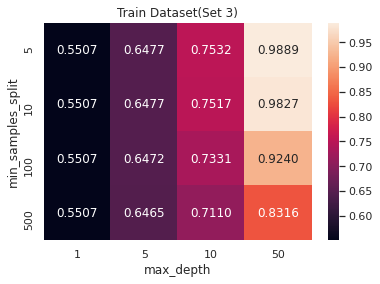

In [ ]:
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': train_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Train Dataset(Set 3)")
plt.show()

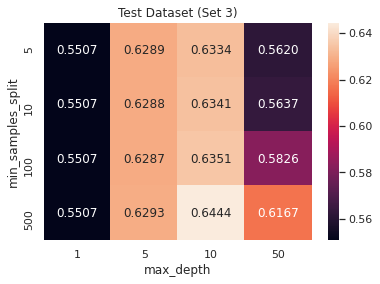

In [ ]:
uniform_data = pd.DataFrame({'min_samples_split': min_samples_split, 'max_depth': max_depth, 'Z': cv_auc})
uniform_data = uniform_data.pivot("min_samples_split","max_depth","Z")
ax= sns.heatmap(uniform_data, annot= True, fmt= ".4f")
plt.title("Test Dataset (Set 3)")
plt.show()

In [ ]:
best_max_depth= clf3.best_params_['max_depth']
best_min_samples_split= clf3.best_params_['min_samples_split']
print("best_max_depth= ",best_max_depth)
print("best_min_samples_split= ",best_min_samples_split)

best_max_depth=  10
best_min_samples_split=  500


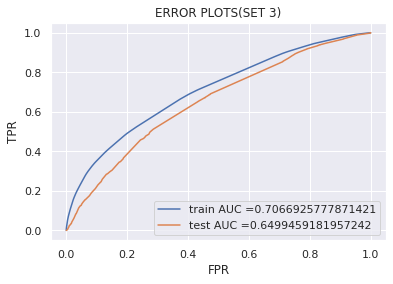

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


dt_set3 = DecisionTreeClassifier(max_depth= best_max_depth, min_samples_split= best_min_samples_split ,class_weight='balanced')
dt_set3.fit(X_new_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(dt_set3, X_new_tr)
y_test_pred = prob_predict(dt_set3, X_new_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS(SET 3)")
plt.grid(True)
plt.show()

In [ ]:
## 3 Confusion Matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4157160253859343 for threshold 0.495


Train Confusion Matrix


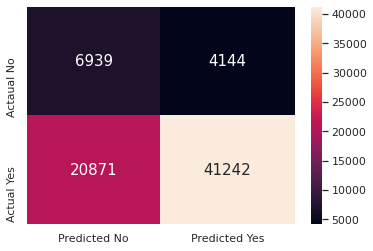

In [ ]:
print("Train Confusion Matrix")
get_confusion_matrix(y_train, y_train_pred)

Test Confusion Matrix


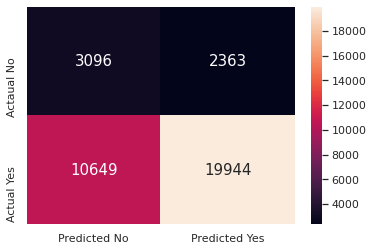

In [ ]:
print("Test Confusion Matrix")
get_confusion_matrix(y_test, y_test_pred)

In [ ]:
#get all the false positive data points with test dataset
actual_output = y_test
pred_output = predict_with_best_t(y_test_pred, best_t)
print(len(actual_output))
print(len(pred_output))

36052
36052


In [ ]:
false_positive_data = []
for i in range(len(y_test)):
    if (actual_output[i] == 0) &  (pred_output[i] == 1):
        #print(i)
        false_positive_data.append(i)
print(false_positive_data[0:20])
print(len(false_positive_data))

[2, 10, 22, 43, 48, 53, 91, 95, 97, 101, 105, 116, 128, 154, 157, 170, 171, 191, 217, 227]
2363


In [ ]:
false_positive_essay3= []
for i in false_positive_data:
    false_positive_essay3.append(X_test['essay'].values[i])
print(len(false_positive_essay3))

2363


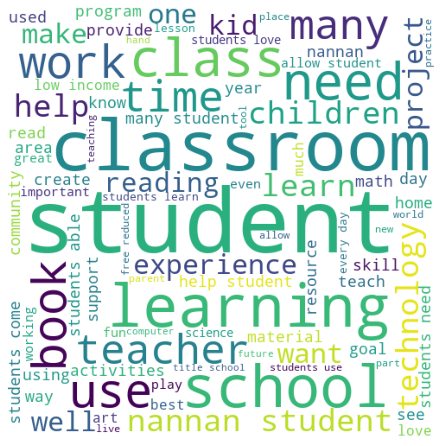

In [ ]:
## 4 Plot the WordCloud with the words of essay text of the false positive data points of set 3

### Plot the WordCloud with the words of essay text of these false positive data points
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = list(STOPWORDS)
for val in false_positive_essay3:
    # typecaste each val to string 
    val = str(val) 
   # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
## 5 Plot the box plot with the price of the false positive data points of set 3
false_positive_price3= []
for i in false_positive_data:
    false_positive_price3.append(X_test['price'].values[i])
print(len(false_positive_price3))


2363


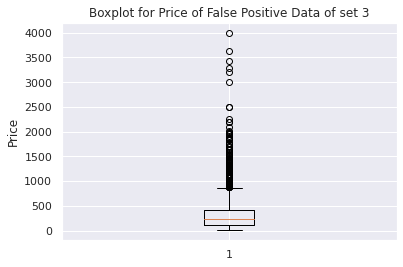

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([false_positive_price3])
plt.ylabel('Price')
plt.title("Boxplot for Price of False Positive Data of set 3")
plt.grid(True)
plt.show()

In [ ]:
## 6 Plot pdf with teacher_number_of_previously_posted_projects of false positive data points of set_3

false_positive_prev_projects3= []
for i in false_positive_data:
    false_positive_prev_projects3.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(false_positive_prev_projects3))

2363


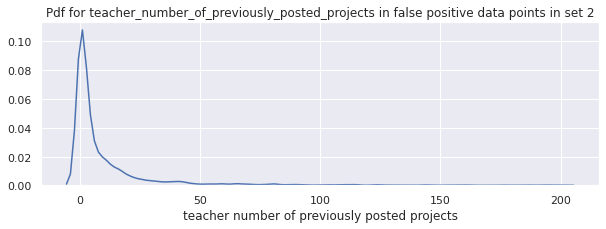

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_prev_projects3, hist=False)
#sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
#plt.legend()
plt.title("Pdf for teacher_number_of_previously_posted_projects in false positive data points in set 2")
plt.xlabel("teacher number of previously posted projects")
plt.show()

<h1>2. Summary</h1>

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Max_Depth","Min_Samples_Split", "Train AUC", "Test Auc"]
x.add_row(["TFIDF","DECISION_TREE_CLASSIFIER", 10, 500, 0.706, 0.650 ])
x.add_row(["TFIDF_W2V","DECISION_TREE_CLASSIFIER", 5, 500, 0.654, 0.629])
x.add_row(["TFIDF(NEW SET)","DECISION_TREE_CLASSIFIER", 10, 500, 0.7066, 0.649])
print(x)

+----------------+--------------------------+-----------+-------------------+-----------+----------+
|   Vectorizer   |          Model           | Max_Depth | Min_Samples_Split | Train AUC | Test Auc |
+----------------+--------------------------+-----------+-------------------+-----------+----------+
|     TFIDF      | DECISION_TREE_CLASSIFIER |     10    |        500        |   0.706   |   0.65   |
|   TFIDF_W2V    | DECISION_TREE_CLASSIFIER |     5     |        500        |   0.654   |  0.629   |
| TFIDF(NEW SET) | DECISION_TREE_CLASSIFIER |     10    |        500        |   0.7066  |  0.649   |
+----------------+--------------------------+-----------+-------------------+-----------+----------+
